In [90]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<h1><center> Diffusion Equation Solved using Finite Element Spatial Discretization with Various Time-Stepping Schemes</center><h1>
    
    
### Abstract: 
We consider the 2-dimensional time-dependent heat equation with dirichlet boundary conditions and solve it numerically by 2 methods. We first apply Rothe's method, discretizing the solution first in time by a backwards euler finite difference approximation and then in space by CG finite element method. We then apply the method of lines, discretizing in space by the CG finite element method and then discretizing in time by backward euler and forward euler. The orders of convergence of the respective methods are tested and demonstrated. The stability conditions of forward euler are demonstrated. An illustration of the theory of the respective methods is given. 

### Introduction 
We consider the solution to 2-dimensional time-dependent heat equation on a bounded convex domain $\Omega$ with smooth boundary $\partial \Omega$, which reads 
$$
\begin{align} 
\frac{\partial u}{\partial t} &= \Delta u + f, &&\qquad \text{ in } \Omega \times(0,T]  \\
u &= u_D, &&\qquad \text{ on } \partial \Omega_D \times (0,T] \\
\frac{\partial u}{\partial n}  &= u_N, &&\qquad \text{ on } \partial \Omega_N \times (0,T] \\
\alpha u + \beta \frac{\partial u}{\partial n} &= u_R, &&\qquad \text{ on } \partial \Omega_R \times (0,T] \\
\\
u &= u_0, &&\qquad \text{ at } t=0, 
\end{align}
$$
where $\nu$, $\alpha$, and $\beta$ are constants. The source function, as well as boundary conditions, (though not the domains $\partial\Omega_D, \ \partial\Omega_N , \ \partial\Omega_R$) are allowed to vary in both space and time. For the examples given we consider only Dirichlet boundary conditions and the theory on the numerical methods below considers only Dirichlet boundary conditions for simplicity.

### Rothe's Method

In the Roche method we first discretize in time, and then discretize in space. We follow the presentation of [cite FEniCS book here]. We discretize in time by means of a finite difference approximation, which yields a recursive set of stationary problems that may be then solved by the Galerkin finite element method. 

Let a superscript $k$ denote a quantity at time $t_k$ where $k$ is a natural number counting time levels. The finite difference discretization in time is given by first considering the PDE at some fixed level of time $k$ 
$$
    \begin{align}
    \frac{\partial}{\partial t} u^k = \Delta u^k +f^k. 
    \end{align}
$$
Then the time derivative is approximated by a finite difference, in particular for our presentation, we employ backward-euler for simplicity and stability reasons: 
$$
    \begin{align} 
    \frac{\partial}{\partial t} u^k \approx \frac{u^k - u^{k-1}}{dt}, 
    \end{align} 
$$
where $dt$ is the size of the time discretization. Combining our equations we have 
$$
    \begin{align}
    \frac{u^k - u^{k-1}}{dt} = \Delta u^k +f^k. 
    \end{align}
$$
Reordering so that $u^k$ appears on the left side only we generate a recursive set of spatial problems for $u^k$ assuming that the previous $u^{k-1}$ is known. So the equation we wish to solve is given by: 
$$
    \begin{align}
    u^0 &= u_0 \\
    u^k - dt \Delta u^k &= u^{k-1} +dtf^k, &&\qquad k=1,2,...\\
    u^k &= u_D^k &&\qquad \text{ on } \partial \Omega, \text{ for } t>0. 
    \end{align} 
$$
    So at each time step we are solving a Poisson equation with Dirichlet boundary conditions, a problem suitable for the Galerkin finite element method. To do this we first turn this equation into its weak for. We multiply by a test function $v \in H^1_0(\Omega)$, where $H^1_0(\Omega) = \{v \in H^1(\Omega): \gamma v = 0 \}$ where $\gamma : H^1 (\Omega) \rightarrow L_2(\partial \Omega)$ is the trace operator [cite Larsson].  
$$ 
    \begin{align} 
    \int_\Omega \left( uv -dt\Delta u^kv \right) = \int_\Omega \left(u^{k-1} +dtf^k\right)v. 
    \end{align}
$$
Integrating by parts we may move one gradient from the trial function ($u^k$) to the test function to yield 


$$
    \begin{align} 
    \\
    a(u^k,v) &= L(v), \text{ where } \\
    \\
    a(u^k,v) &= \int_\Omega (u^kv +dt \nabla u^k \cdot \nabla v), \\
    L(v) &= \int_\Omega (u^{k-1} +dt f^k)v  \ . \\
    \end{align}
$$
where the boundary term vanishes as our test function vanishes on the boundary. The continuous variational problem is to find $u^k \in H^1(\Omega)$ such that $a(u^k,v) = L(v)$ holds for all $v \in H^1_0(\Omega)$. Our discretization is formed by restricting $H^1(\Omega)$ to a finite-dimensional space and solving the resulting finite dimensional problem. 

In particular we utilize the Galerkin finite element method to implement this discretization, details of which can be found in [cite Stig, and Brenner and Fenics Books and Quarteroni].  

### Examples 1 Rothe Method Exact Solution 

To test our formulation we construct a problem for which our discertization can produce an exact solution (barring errors due to finite precision computation). This problem is constructed as in [cite FEniCS]. The backward time difference that we employed is exact for linear functions so we consider a solution that is linear in time. On uniform meshes (as we will be employing for this problem) the 1st order Lagrange space (space of piece-wise linear functions) is exact for quadratic functions on the nodal values. So we consider a solution 
$$
    \begin{align}
    u = 1+x^2+\alpha y^2 +\beta t,
    \end{align}
$$
which will be exact on our nodal values when computed with our method regardless of the courseness of the mesh or time discretization. Inserting this solution into our PDE we derive that $u_0 = u(x,y,0)$ and that $f(x,y,t) = \beta - 2-2\alpha$ and $u_D = u$ for $u$ to be the solution to our PDE. 

The implementation is given below. Note that the code for the the FE discretization is written almost precisely as its mathematical formulation, with few extra considerations to be given. The time discretization does have to be manually coded in less illuminating language, as FEniCS has no internal mechanism for time-stepping. The errors are as promised exact for on the nodal values regardless of the level of discretization of time or space. 

In [100]:
from fenics import *
import numpy as np 


T = 10.0 #final time 
num_steps = 5 #number of time steps
dt = T/num_steps #time step szie
alpha = 3  # parameter alpha
beta = 1.2 # parameter beta 

#Create mesh and define function space 

mesh = UnitSquareMesh(10,10)
V = FunctionSpace(mesh,'P',1)

#Define boundary conditions 
u_D = Expression('1+x[0]*x[0]+alpha*x[1]*x[1]+beta*t', degree=2,alpha=alpha, beta=beta,t=0)

def boundary(x,on_boundary): 
    return on_boundary

bc = DirichletBC(V,u_D,boundary)

#We use u_n for the current timestep, and u for the next timestep (the one we are solving for)

#initial condition (can either project or interpolate, standard is project 
#but in this cases we interpolate as our solution should be exact)

u_n = interpolate(u_D, V)

#Define the variational problem

u = TrialFunction(V)
v = TestFunction(V)
f = Expression('beta-2-2*alpha',degree=1, alpha=alpha,beta=beta)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

#Assemble the stiffness matrix (prior to time stepping as we only need to do it once)
A = assemble(a)

# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

#Time Stepping 
u = Function(V)
t=0
for n in range(num_steps): 
    
    #Update current time
    t+=dt
    u_D.t = t
    
    #Assemble RHS 
    b=assemble(L)
    bc.apply(A,b) 
    
    #Compute Solution 
    solve(A,u.vector(),b)
    
    #Display error at vertices
    u_e = interpolate(u_D,V)
    error = np.abs(u_e.vector() - u.vector()).max()
    print('t = %.2f: error = %.3g' % (t, error))
    
    #Update previous solution 
    u_n.assign(u)
    
    #Save to file 
    vtkfile << (u, t)

t = 2.00: error = 2.13e-14
t = 4.00: error = 3.2e-14
t = 6.00: error = 4.26e-14
t = 8.00: error = 4.97e-14
t = 10.00: error = 6.39e-14


An animation of the solution is given below. 

In [87]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./Animations/Exact Rothe/output.mp4" type="video/ogg">
</video></div>

### Example 2 Rothe Method Known Solution

We apply the same procedure as before and consider a solution 
$$
\begin{align}
u = \beta t \sin(\pi x) \cos (\pi y) + x\sin(\pi t), 
\end{align}
$$
which cannot be solved exactly by this method. We again use the domain $[0,1] \times [0,1]$. The boundary conditions and source necessary to have this as a solution are given by: 
$$
\begin{align}
u_D &= u \\
u_0 &= u(0) = 0 \\
f  &= \beta \pi^2 \sin (\pi x)\cos (\pi y)(1+ 2t\pi^2) + \pi x \cos(\pi t)
\end{align}
$$

An animation of the computed solution from $t=0$ to $t=4$ is given below. 

In [88]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./Animations/Ex2_Rothe/output.mp4" type="video/mp4">
</video></div>

Using this solution we can test the convergence properties of our method. We first consider a fixed number of time steps and increase the discretization in space to test the order of convergence with respect to the spatial discretization.

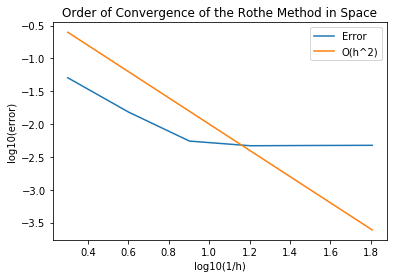

In [94]:
from fenics import *
import numpy as np 
import matplotlib.pyplot as plt


T = 1.0 #final time 
num_steps = 40 #number of time steps
dt = T/num_steps #time step size
beta = 1.0 # parameter beta 
start =2
end =7

#Define error storage matrix 
errors = np.zeros((num_steps,(end-start+1)))

# We iterate through mesh sizes
for iter in range(start, end+1):
    h = 2**iter
#Create mesh and define function space 
    mesh = UnitSquareMesh(h,h)
    V = FunctionSpace(mesh,'P',1)

#Define boundary conditions 
    u_D = Expression('beta*t*sin(pi*x[0])*cos(pi*x[1])+x[0]*sin(pi*t)', degree=2, beta=beta,t=0)

    def boundary(x,on_boundary): 
        return on_boundary

    bc = DirichletBC(V,u_D,boundary)

#We use u_n for the current timestep, and u for the next timestep (the one we are solving for)

#initial condition (can either project or interpolate, standard is project 
#but in this cases we interpolate as our solution should be exact)

    u_n = interpolate(u_D, V)

#Define the variational problem

    u = TrialFunction(V)
    v = TestFunction(V)
    f = Expression('beta*sin(pi*x[0])*cos(pi*x[1])*(1+2*t*pi*pi)+pi*x[0]*cos(pi*t)',degree=1, beta=beta,t=0)

    F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
    a, L = lhs(F), rhs(F)

#Assemble the stiffness matrix (prior to time stepping as we only need to do it once)
    A = assemble(a)

# Create VTK file for saving solution
    vtkfile = File('Ex2/Rothe/'+str(h)+'/solution.pvd')

#Time Stepping 
    u = Function(V)
    t=0
    for n in range(num_steps): 
    
    #Update current time
        t+=dt
        u_D.t = t
        f.t=t
    
    #Assemble RHS 
        b=assemble(L)
        bc.apply(A,b) 
    
    #Compute Solution 
        solve(A,u.vector(),b)
        
    #Display error at vertices
        u_e = interpolate(u_D,V)
        errors[n][iter-start] = np.abs(u_e.vector() - u.vector()).max()
        #print('t = %.2f: error = %.3g' % (t, errors[n][iter-start]))
    
    #Update previous solution 
        u_n.assign(u)
    
    #Save to file 
        vtkfile << (u, t)

#Plot Convergence results 

xval = np.arange(start-1,end)*np.log10(2)

#fig = plt.figure()
plt.plot(xval,np.log10(np.abs(errors).max(0)), label='Error')
plt.plot(xval,-2*xval, label='O(h^2)')
plt.xlabel('log10(1/h)')
plt.ylabel('log10(error)')
plt.title('Order of Convergence of the Rothe Method in Space')
plt.legend()
plt.show()
#plt.savefig('RotheConvergenceOrder.png', bbox_inches='tight')

Clearly from the plot we can see that the method is order $h^2$. This is an expected result as the we are using the space of piecewise linear functions in our finite element discretization and the error in the solution to the Poisson problem using this space is order $h^2$ in the $L^2$ norm. [cite ]Do note that the error stalls, whihch is expected as the total error is porportional to both $h^2$ and $dt$ the time step and we left the time step fixed for the test. Similarily considering a fixed spatial discretization and adjusting the time step we have. 

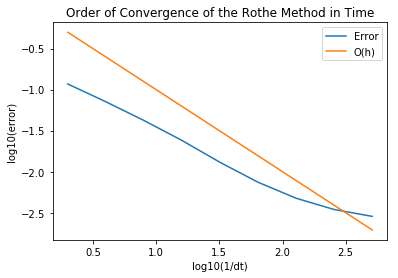

<Figure size 432x288 with 0 Axes>

In [95]:
from fenics import *
import numpy as np 
import matplotlib.pyplot as plt


T = 4.0 #final time 
h = 40 #mesh size
beta = 1.0 # parameter beta 
start =2
end =10

#Define error storage matrix 
errors = np.zeros(((end-start+1),1))

# We iterate through time steps

for iter in range(start, end+1):
    num_steps = 2**iter #number of time steps
    dt = T/num_steps #time step size
    errorstemp = np.zeros((num_steps,1))
#Create mesh and define function space 
    mesh = UnitSquareMesh(h,h)
    V = FunctionSpace(mesh,'P',1)

#Define boundary conditions 
    u_D = Expression('beta*t*sin(pi*x[0])*cos(pi*x[1])+x[0]*sin(pi*t)', degree=2, beta=beta,t=0)

    def boundary(x,on_boundary): 
        return on_boundary

    bc = DirichletBC(V,u_D,boundary)

#We use u_n for the current timestep, and u for the next timestep (the one we are solving for)

#initial condition (can either project or interpolate, standard is project 
#but in this cases we interpolate as our solution should be exact)

    u_n = interpolate(u_D, V)

#Define the variational problem

    u = TrialFunction(V)
    v = TestFunction(V)
    f = Expression('beta*sin(pi*x[0])*cos(pi*x[1])*(1+2*t*pi*pi)+pi*x[0]*cos(pi*t)',degree=1, beta=beta,t=0)

    F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
    a, L = lhs(F), rhs(F)

#Assemble the stiffness matrix (prior to time stepping as we only need to do it once)
    A = assemble(a)

# Create VTK file for saving solution
    vtkfile = File('Ex2/Rothe/'+str(h)+'/solution.pvd')

#Time Stepping 
    u = Function(V)
    t=0
    for n in range(num_steps): 
    
    #Update current time
        t+=dt
        u_D.t = t
        f.t=t
    
    #Assemble RHS 
        b=assemble(L)
        bc.apply(A,b) 
    
    #Compute Solution 
        solve(A,u.vector(),b)
        
    #Display error at vertices
        u_e = interpolate(u_D,V)
        errorstemp[n] = np.abs(u_e.vector() - u.vector()).max()
        #print('t = %.2f: error = %.3g' % (t, errors[n][iter-start]))
    
    #Update previous solution 
        u_n.assign(u)
    
    #Save to file 
        vtkfile << (u, t)
    errors[iter-start]= np.abs(errorstemp).max()
    
#Plot Convergence results 
#print(errors)
xval = np.arange(start-1,end)*np.log10(2)

#fig = plt.figure()
plt.plot(xval,np.log10(errors), label='Error')
plt.plot(xval,-xval, label='O(h)')
plt.xlabel('log10(1/dt)')
plt.ylabel('log10(error)')
plt.title('Order of Convergence of the Rothe Method in Time')
plt.legend()
plt.show()
plt.savefig('RotheConvergenceOrder_time.png', bbox_inches='tight')

Which yields the expected order $h$ convergence. Again the error stalls after a certain point as we are leaving the spatial discretization fixed. 

## Method of Lines

In the method of lines we first discretize in space, generating an evolutionary system of ODEs', and then discretize this system of ODEs' using standard time integrators. We present the theory below for the homogeneneous case only, for simplicity. 

We integrate our PDE with respect to a test function $v \in H^1_0(\Omega)$, 
$$
    \begin{align}
        \int_\Omega \frac{\partial u}{\partial t}v = \int_\Omega\Delta uv + \int_\Omega fv
    \end{align} 
$$
by integration by parts this becomes our variational form 
$$
    \begin{align}
        \int_\Omega \frac{\partial u}{\partial t}v = -\int_\Omega \nabla u \cdot \nabla v + \int_\Omega fv
    \end{align} 
$$
Defining the following 
$$
    \begin{align}
        a(v,w) &= \int_\Omega \nabla v \cdot \nabla w \\
        (v,w) &= \int_\Omega vw. 
    \end{align}
$$
we can write our varitional problem as: find $u \in H^1_0 (\Omega)$ such that $(u_t,v) + a(u,v) = (f,v), \ \forall v \in H^1_0$ and $u(x,y,0) = u_0$. Replacing our continuous function spaces with finite dimensional ones we arrive at finite systems of equations. That is consider $u_h, v_h  \in V_h$ where $V_h$ is a finite dimensional subspace of $H^1_0$. So our finite dimensional variational problem is to find
$$
    \begin{align}
        (u_{h,t},v_h) + a(u_h,v_h) = (f,v_h) , \qquad \forall v_h \in V_h, 
    \end{align}
$$
where $u_h(x,y,0) = u_{0,h}(x,y)$, some approximation of our initial solution. As this space is finite dimensional we can consider a basis for it $\{ \varphi_j \}$. So in terms of this basis our our solution may be represented as 
$$
    \begin{align}
        u_h(x,y,t) = \sum_{j=1}^{M_h} \alpha_j(t)\varphi(x,y).  
    \end{align}
$$
So our problem then becomes find $\alpha(t)$ such that the following holds:
$$
    \begin{align}
        \sum_{j=1}^{M_h} \alpha'_j(t) (\varphi_j, \varphi_k) +\sum_{j=1}^{M_h} \alpha_j(t) a(\varphi_j,\varphi_k) = (f,\varphi_k), \qquad k=1,... , M_h
    \end{align} 
$$
In matrix notation 
$$
    \begin{align}
        M\alpha'(t)+A\alpha(t) = b(t), \qquad t>0,
    \end{align}
$$
and $\alpha_j(0)$ is nodal value of $u_{0,h}$, where $B_{kj} = (\varphi_j,\varphi_k)$ is the mass matrix and $A_{kj} = a(\varphi_j,\varphi_k)$ is the stiffness matrix  and $b_k = (f,\varphi_k)$. Rewriting this as 
$$
    \begin{align}
        \alpha'(t) &= M^{-1}(b-A\alpha(t)) \\
        \alpha(0) = 
    \end{align}
$$
We now have an initial value ODE for $\alpha(t)$ which can be solved by a standard numerical method like those mentioned in class. 

### Solving the Initial Value Problem using Backward Euler 

We now solve the initial value ODE using a backward euler scheme. Consider some discretization of time with time step $dt$, $t_1, t_2, ...t_N$ and let $\alpha^n$ denote the solution at time $t_n$. Then backwards euler reads 
$$
    \begin{align}
    u^{n+1} &= dtM^{-1}(b-Au^{n+1})+u^n \\
    u^{n+1} &= (M+dtA)^{-1}(dtb + Mu^n). 
    \end{align}
$$
Practically when solving for $u^{n=1}$ we do not invert the matrix $(M+dtA)$ but instead solve $(M+dtA)u^{n+1} = dtb+Mu^n$ numerically using some iterative scheme. The details of this matrix solve are taken care of by FEniCS, though if necessary the particulars are easily uncovered and modified. The backend for the linear algebra of FEniCS is PETSc, which has a plethora of options to choose from. 

The error from this method is given by the following: 
$$
    \begin{align} 
    \end{align}
$$
The details of the derivation can be seen in 

Note that the convergence order for backward Euler is the expected order $h$ convergence. 

### Forward Euler 
We apply the same test to forward euler, the results in this case are a bit more dramatic for one reason. Forward Euler is not unconditionally stable, and thus there is a minimum time discretization needed to obtain any realistic solution. 

### Example 3 Known Solution for Method of Lines
we apply the same example as Example 2. 

#### Backward Euler

We first fix our spatial discretization and then consider what happens as we adjust the time-descretization.

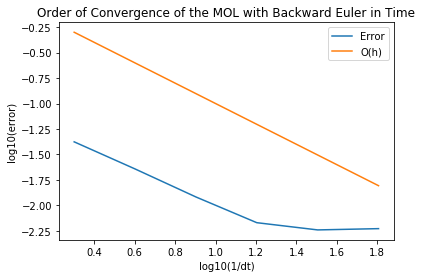

In [102]:
from fenics import *
import numpy as np

T = 1 #final time 
alpha = 1  # parameter alpha
beta = 1.2 # parameter beta 
start =2
end =7

#Define error storage matrix 
errors = np.zeros(((end-start+1),1))

#Create mesh and define function space 
mesh = UnitSquareMesh(20,20)
V = FunctionSpace(mesh,'P',1)

#Define boundary conditions 
u_D = Expression('beta*t*sin(pi*x[0])*cos(pi*x[1])+x[0]*sin(pi*t)', degree=2, beta=beta,t=0)

def boundary(x,on_boundary): 
    return on_boundary

bc = DirichletBC(V,u_D,boundary)

#initial condition (can either project or interpolate, standard is project 

u_0 = interpolate(u_D, V)

#Define the variational problem

u = TrialFunction(V)
v = TestFunction(V)
f = Expression('beta*sin(pi*x[0])*cos(pi*x[1])*(1+2*t*pi*pi)+pi*x[0]*cos(pi*t)',degree=1, beta=beta,t=0)

F = dot(grad(u), grad(v))*dx -  f*v*dx
a, L = lhs(F), rhs(F)

    #Assemble stiffness matrix (this will not change in the time stepping)
A = assemble(a)

    #Assemble the mass-matrix (this will not change in the time stepping)
M = assemble(inner(u,v)*dx)

    #Note that boundary conditions are time-dependent so they will have to be applied within the time-stepping

    # Create VTK file for saving solution
vtkfile = File('heat_exact_MOL/BE/solution.pvd')

    #Time Stepping (via Backward Euler)
u = Function(V)

#iterate through the time-stepping for order of convergence test
for iter in range(start, end+1):
    u.assign(u_0) #initial condition
    num_steps = 2**iter #number of time steps
    dt = T/num_steps #time step size
    errorstemp = np.zeros((num_steps,1))
    t=0
    for n in range(num_steps): 
    
        #Update current time
        t+=dt
        u_D.t = t
        f.t=t
        
        #Assemble RHS 
        b = assemble(L)
        bc.apply(A,b) 
    
        #Compute Solution 
        solve((M+dt*A),u.vector(),(dt*b+M*u.vector()))
    
        
        #Display error at vertices
        u_e = interpolate(u_D,V)
        errorstemp[n] = np.abs(u_e.vector() - u.vector()).max()
        #print(errorstemp[n])
    
        #Save to file 
        vtkfile << (u, t)
    errors[iter-start]= np.abs(errorstemp).max()
    
    
#Plot Convergence results 
xval = np.arange(start-1,end)*np.log10(2)

#fig = plt.figure()
plt.plot(xval,np.log10(errors), label='Error')
plt.plot(xval,-xval, label='O(h)')
plt.xlabel('log10(1/dt)')
plt.ylabel('log10(error)')
plt.title('Order of Convergence of the MOL with Backward Euler in Time')
plt.legend()
plt.show()
#plt.savefig('BackwardEulerConvergenceOrder_Exact_time.png', bbox_inches='tight')

As expected from the theoretical convergence of the method, our time discretization has an order $h$ convergence. The error does stall, which is expected as the total error of the method is the sum of contributions from the time discretization and the spatial discretization. With our spatial discretization fixed there is a minimum error that can be achieved. 

Now we test for a fixed time discretization and consider that consequences of adjusting the spatial discretization. 

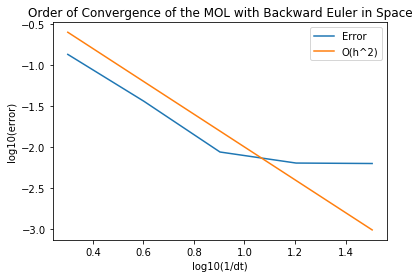

In [97]:
from fenics import *
import numpy as np


T = 1 #final time 
num_steps = 30 #number of time steps
dt = T/num_steps #time step size
alpha = 1  # parameter alpha
beta = 1.2 # parameter beta 
start =2
end =6

#Define error storage matrix 
errors = np.zeros(((end-start+1),1))
for iter in range(start, end+1):
    
 
    h = 2**iter
    # Create mesh and define function space 
    mesh = UnitSquareMesh(h,h)
    V = FunctionSpace(mesh,'P',1)

    #Define boundary conditions 
    u_D = Expression('beta*t*sin(pi*x[0])*cos(pi*x[1])+x[0]*sin(pi*t)', degree=2, beta=beta,t=0)
    
    def boundary(x,on_boundary): 
        return on_boundary

    bc = DirichletBC(V,u_D,boundary)

    #initial condition (can either project or interpolate, standard is project 

    u_0 = interpolate(u_D, V)

    #Define the variational problem

    u = TrialFunction(V)
    v = TestFunction(V)
    f = Expression('beta*sin(pi*x[0])*cos(pi*x[1])*(1+2*t*pi*pi)+pi*x[0]*cos(pi*t)',degree=1, beta=beta,t=0)

    F = dot(grad(u), grad(v))*dx -  f*v*dx
    a, L = lhs(F), rhs(F)

    #Assemble stiffness matrix (this will not change in the time stepping)
    A = assemble(a)

    #Assemble the mass-matrix (this will not change in the time stepping)
    M = assemble(inner(u,v)*dx)

    #Note that boundary conditions are time-dependent so they will have to be applied within the time-stepping

    # Create VTK file for saving solution
    vtkfile = File('heat_exact_MOL/BE/solution.pvd')

    #Time Stepping (via Backward Euler)
    u = Function(V)

    #iterate through the time-stepping for order of convergence test
    u.assign(u_0)
    errorstemp = np.zeros((num_steps,1))
    t=0
    for n in range(num_steps): 
    
        #Update current time
        t+=dt
        u_D.t = t
        f.t=t
        
        #Assemble RHS 
        b = assemble(L)
        bc.apply(A,b) 
    
        #Compute Solution 
        solve((M+dt*A),u.vector(),(dt*b+M*u.vector()))
        
        #Display error at vertices
        u_e = interpolate(u_D,V)
        errorstemp[n] = np.abs(u_e.vector() - u.vector()).max()
        #print(errorstemp[n])
    
        #Save to file 
        vtkfile << (u, t)
    errors[iter-start]= np.abs(errorstemp).max()
    
    
#Plot Convergence results 
xval = np.arange(start-1,end)*np.log10(2)

#fig = plt.figure()
plt.plot(xval,np.log10(errors), label='Error')
plt.plot(xval,-2*xval, label='O(h^2)')
plt.xlabel('log10(1/dt)')
plt.ylabel('log10(error)')
plt.title('Order of Convergence of the MOL with Backward Euler in Space')
plt.legend()
plt.show()
#plt.savefig('BackwardEulerConvergenceOrder_Exact_time.png', bbox_inches='tight')

As we are using linear piecewise elements we expect an order $h^2$ convergece, which is demonstrated experimentally. Again the stalling of error originates from the fixed time discretization which sets a minimum error.

#### Forward Euler

We now consider the 

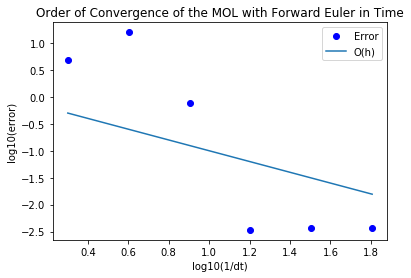

In [98]:
from fenics import *
import numpy as np 


T = .005 #final time 
alpha = 3  # parameter alpha
beta = 1.2 # parameter beta 
start =2
end =7

#Define error storage matrix 
errors = np.zeros(((end-start+1),1))
#Create mesh and define function space 

mesh = UnitSquareMesh(20,20)
V = FunctionSpace(mesh,'P',1)

#Define boundary conditions 
u_D = Expression('beta*t*sin(pi*x[0])*cos(pi*x[1])+x[0]*sin(pi*t)', degree=2, beta=beta,t=0)

def boundary(x,on_boundary): 
    return on_boundary

bc = DirichletBC(V,u_D,boundary)

#initial condition
u_0 = interpolate(u_D, V)

#Define the variational problem 

u = TrialFunction(V)
v = TestFunction(V)
f = Expression('beta*sin(pi*x[0])*cos(pi*x[1])*(1+2*t*pi*pi)+pi*x[0]*cos(pi*t)',degree=1, beta=beta,t=0)

F = dot(grad(u), grad(v))*dx -  f*v*dx
a, L = lhs(F), rhs(F)

#Assemble stiffness matrix (this will not change in the time stepping)
A = assemble(a)

#Assemble the mass-matrix (this will not change in the time stepping)
M = assemble(inner(u,v)*dx)

#Note that boundary conditions are time-dependent so they will have to be applied within the time-stepping

# Create VTK file for saving solution
vtkfile = File('heat_exact_MOL/FE/solution.pvd')

    #Time Stepping (via Forward Euler) , Our solution at each time step is given by y. x is a dummy variable. 
y = Function(V)    
x = Function(V)


#Iterate through the time discretizations to make an order of convergence plot
for iter in range(start, end+1):
    y.assign(u_0) #initial condition
    num_steps = 2**iter #number of time steps
    dt = T/num_steps #time step size
    errorstemp = np.zeros((num_steps,1))
    t=0
    for n in range(num_steps): 
    
        #Update current time
        t+=dt
        u_D.t = t
        f.t=t
        
        #Assemble RHS 
        b = assemble(L)
        bc.apply(A,b) 
    
        #Compute Solution 
        solve(M,x.vector(), b-A*y.vector())
        y.vector().axpy(dt,x.vector())
        
        
        #Display error at vertices
        u_e = interpolate(u_D,V)
        errorstemp[n] = np.abs(u_e.vector() - y.vector()).max()

        #Save to file 
        vtkfile << (y, t)

    errors[iter-start]= np.abs(errorstemp).max()
    
    
#Plot Convergence results 
xval = np.arange(start-1,end)*np.log10(2)

#fig = plt.figure()
plt.plot(xval,np.log10(errors),'bo', label='Error')
plt.plot(xval,-xval, label='O(h)')
plt.xlabel('log10(1/dt)')
plt.ylabel('log10(error)')
plt.title('Order of Convergence of the MOL with Forward Euler in Time')
plt.legend()
plt.show()
#plt.savefig('ForwardEulerConvergenceOrder_Exact_time.png', bbox_inches='tight')